### Purpose
- Replicating Kim and Han(2023)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname = "c:/windows/fonts/malgun.ttf").get_name()
rc('font', family = font_name)
rcParams["axes.unicode_minus"] = False

from sklearn.metrics import mean_squared_error, mean_absolute_error

from boruta import BorutaPy

# custom
from functions.func_rw_1 import rw_rolling_window
from functions.func_ar_111 import har_rolling_window
from functions.func_ar_112 import ar_rolling_window
from functions.func_rf_111 import rf_rolling_window

In [2]:
# Line 7~16
df = pd.read_excel("../data/dataset_HARX(14).xlsx")
# df.dropna(inplace = True) 
data = df.iloc[:, 1:].to_numpy()
data = data[66:, :]

date = df.loc[66:, "Code"]
cols_info = df.iloc[:, 1:].columns

npred = 3240

#TODO: SP_66day,Oil_66day np.nan이 존재함. 
# np.where(pd.isna(data))
# 하루 앞에 빼고 진행하면 되고

Y1 = data[:5740,:]

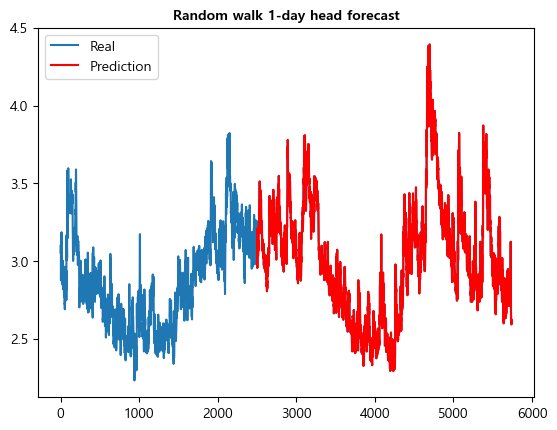

random walk: 1-ahead forecast is finished


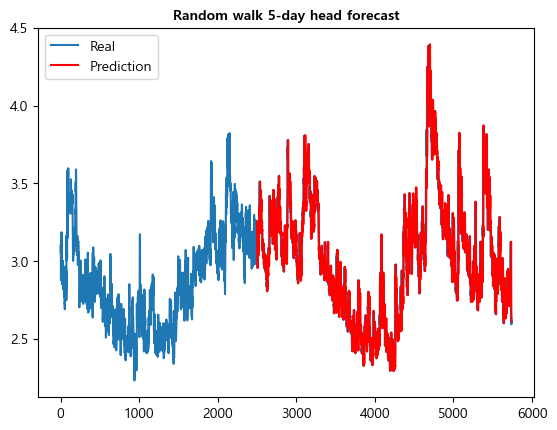

random walk: 5-ahead forecast is finished


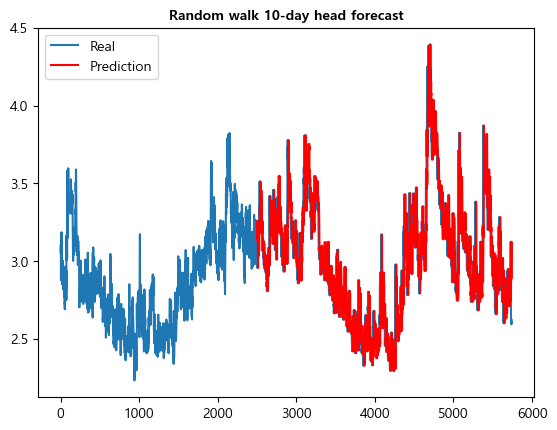

random walk: 10-ahead forecast is finished


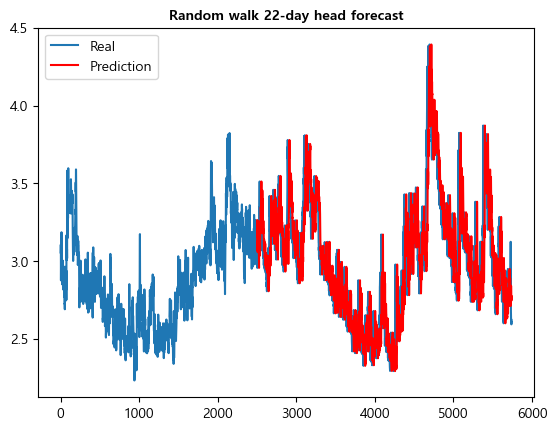

random walk: 22-ahead forecast is finished


In [3]:
# # Line 18 ~21
rw1 = rw_rolling_window(Y1, npred, 1, 1)
rw5 = rw_rolling_window(Y1, npred, 1, 5)
rw10 = rw_rolling_window(Y1, npred, 1, 10)
rw22 = rw_rolling_window(Y1, npred, 1, 22)

In [9]:
# Line 26 ~ 31
# harx1 = har_rolling_window(Y1, npred, "harx", 1, 1, model_type = "fixed") # y_t = y_{t-1} + X_{t-1}
harx5 = har_rolling_window(Y1, npred, "harx", 1, 5, model_type = "fixed") # y_t = y_{t-5} + X_{t-5}
# harx10 = har_rolling_window(Y1, npred, "harx", 1, 10, model_type = "fixed") # y_t = y_{t-10} + X_{t-10}
# harx22 = har_rolling_window(Y1, npred, "harx", 1, 22, model_type = "fixed") # y_t = y_{t-10} + X_{t-10}

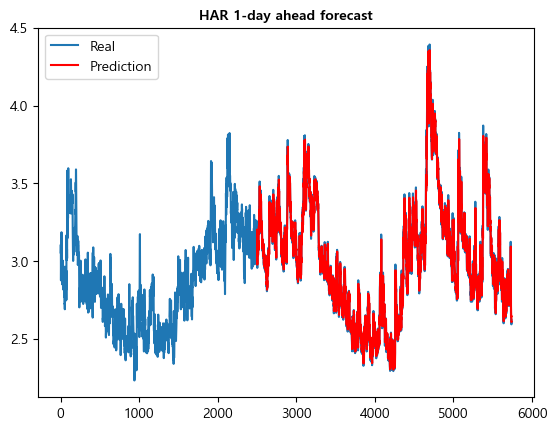

HAR: 1-ahead forecast is finished


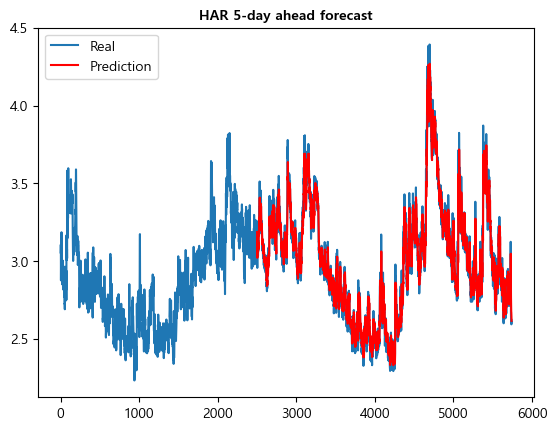

HAR: 5-ahead forecast is finished


In [5]:
# Line 34 ~ 39
Y2 = Y1[:, :5] 
# cols info
# ['lnVIX', 'HAR_5day', 'HAR_10day', 'HAR_22day', 'HAR_66day']

har1 = har_rolling_window(Y2, npred, "har", 1, 1, model_type = "fixed")
har5 = har_rolling_window(Y2, npred, "har", 1, 5, model_type = "fixed")
# har10 = har_rolling_window(Y2, npred, "har", 1, 10, model_type = "fixed")
# har22 = har_rolling_window(Y2, npred, "har", 1, 22, model_type = "fixed")

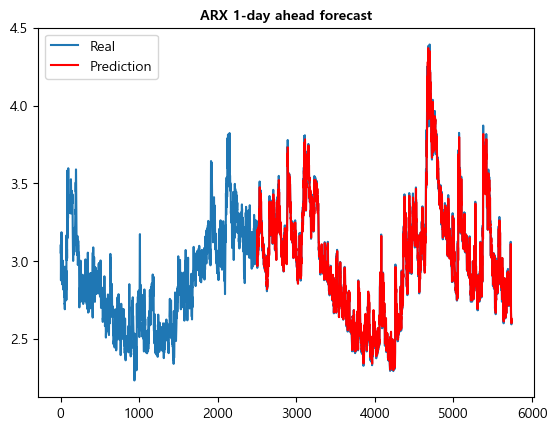

ARX: 1-ahead forecast is finished


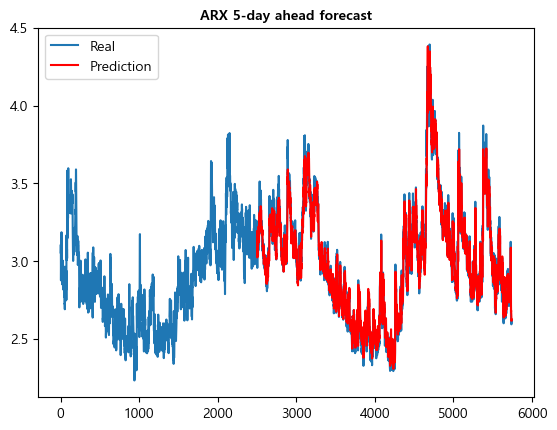

ARX: 5-ahead forecast is finished


In [6]:
# Line 46 ~ 51

Y3 = np.c_[Y1[:, :1], Y1[:, 5:19]] 
# col info 
# ['lnVIX', 'SP_1day', 'SP_5day', 'SP_10day', 'SP_22day', 'SP_66day',
# 'S&PCOMP(MV)', 'Oil_1day', 'Oil_5day', 'Oil_10day', 'Oil_22day',
# 'Oil_66day', 'T10Y3M', 'Credit Spread', 'USG6WIC(TW)']

arx1 = ar_rolling_window(Y3, npred, 1, 1, model_type = "fixed") # y_t = y_{t-1} + y_{t-2} + X_{t-1} + X_{t-2} 
arx5 = ar_rolling_window(Y3, npred, 1, 5, model_type = "fixed") # y_t = y_{t-5} + y_{t-4} + X_{t-5} + X_{t-4} 
# arx10 = ar_rolling_window(Y3, npred, 1, 10, model_type = "fixed") # y_t = y_{t-10} + y_{t-9} + X_{t-10} + X_{t-9}
# arx22 = ar_rolling_window(Y3, npred, 1, 22, model_type = "fixed") # y_t = y_{t-22} + y_{t-21} + X_{t-22} + X_{t-21}

In [8]:
arx5["errors"]

{'rmse': 0.06937540612258078, 'mae': 0.05129508478609411}

In [7]:
# Line 45 ~ 61
# Random Forest(14)
n_jobs = 3
rf1_14 = rf_rolling_window(Y3, npred, 1, 1, n_jobs = n_jobs) # y_t = f(X_{t-1})
# rf5_14 = rf_rolling_window(Y3, npred, 1, 5, n_jobs = n_jobs) # y_t = f(X_{t-5})
# rf10_14 = rf_rolling_window(Y3, npred, 1, 10, n_jobs = n_jobs) # y_t = f(X_{t-14})
# rf22_14 = rf_rolling_window(Y3, npred, 1, 22, n_jobs = n_jobs) # y_t = f(X_{t-22})

KeyboardInterrupt: 

In [8]:
import pickle

# 객체를 pickle로 저장
with open('rf1_14.pkl', 'wb') as f:
    pickle.dump(rf1_14, f)

NameError: name 'rf1_14' is not defined

In [45]:
# Line 73 ~ 84
df3 = pd.read_excel("../data/dataset_0203.xlsx")
# df3.dropna(inplace = True) # np.nan이 존재함
data3 = df3.iloc[:, 1:].to_numpy()

a = np.log(data3[1:, 0]).reshape(-1, 1)
b = data3[1:, 1:11]
c = data3[:, 11:299]
c = np.diff(np.log(c), axis = 0)

Y5 = np.c_[a, b, c]
Y5 = Y5[65:, :]
Y5 = Y5[:5740, :]

In [46]:
# Line 87 ~ 90
rf1_298 = rf_rolling_window(Y5, npred, 1, 1, n_jobs = n_jobs)
# rf5_298 = rf_rolling_window(Y5, npred, 1, 5, n_jobs = n_jobs)
# rf10_298 = rf_rolling_window(Y5, npred, 1, 10, n_jobs = n_jobs)
# rf22_298 = rf_rolling_window(Y5, npred, 1, 22, n_jobs = n_jobs)

c:\Users\PC\anaconda3\envs\vix\lib\site-packages\debugpy\_vendored\pydevd\_pydev_bundle\_pydev_imports_tipper.py:205: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  obj = getattr(obj_to_complete, d)
c:\Users\PC\anaconda3\envs\vix\lib\site-packages\debugpy\_vendored\pydevd\_pydev_bundle\_pydev_imports_tipper.py:205: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  obj = getattr(obj_to_complete, d)
c:\Users\PC\anaconda3\envs\vix\lib\site-packages\debugpy\_vendored\pydevd\_pydev_bundle\_pydev_imports_tipper.py:205: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  obj = getattr(obj_to_complete, d)


KeyboardInterrupt: 

In [ ]:
# Variable Selection using Boruta and Rolling Window
#